# Machine learning algorithms:

## 1. Regression - 
Linear, Multiple, Polynomial

In [1]:
## importing required packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

In [2]:
## getting the data:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv'
fuel_con = pd.read_csv(url)

In [3]:
fuel_con.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
fuel_con.shape

(1067, 13)

#### Data Exploration

In [5]:
fuel_con.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
fuel_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [7]:
df = fuel_con[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

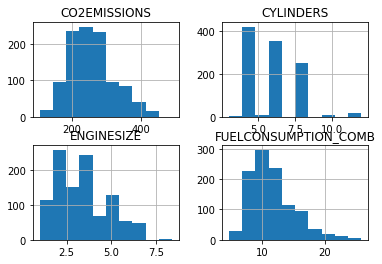

In [8]:
## plotting df:
df.hist()
plt.show()

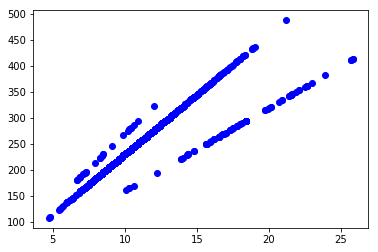

In [9]:
## plotting each of these varibles to check their linear relation:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS,color = 'blue')

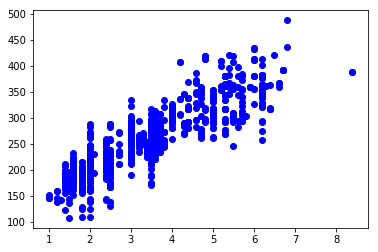

In [10]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color = 'blue')

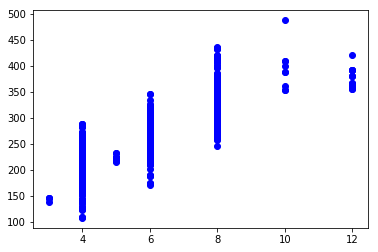

In [11]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS,color = 'blue')

In [12]:
## creating training and testing dataset using numpy:
msk = np.random.rand(len(fuel_con)) < 0.8
train = df[msk]
test = df[~msk]

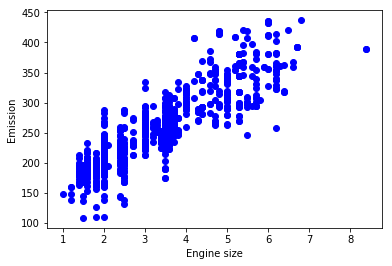

In [13]:
## plotting the training data:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

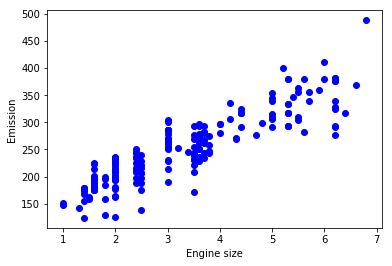

In [14]:
## just to see, plotting the testing data aswell:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
## using simple linear regression model to fit the training data:
# sklearn model to use linear regression:
from sklearn.linear_model import LinearRegression

## CREATING A LINEAR REGRESSION OBJECT:
lm = LinearRegression()
lm.fit(train[['ENGINESIZE']],train[['CO2EMISSIONS']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
## printing out the intercepts and coefficients:
print(lm.coef_,lm.intercept_)

[[39.36821042]] [124.98293883]


In [17]:
## using the data to check the predicted values:
yhat = lm.predict(test[['ENGINESIZE']])
print (yhat[0:5])

## lets check the model accuracy of the predicted values:
print(lm.score(test[['ENGINESIZE']],test[['CO2EMISSIONS']]))

## checking the model accuracy of the testing data set:
print(lm.score(train[['ENGINESIZE']],train[['CO2EMISSIONS']]))

[[262.77167531]
 [262.77167531]
 [262.77167531]
 [219.46664385]
 [357.25538033]]
0.7776345967882033
0.7607268312617393


Text(0, 0.5, 'Emission')

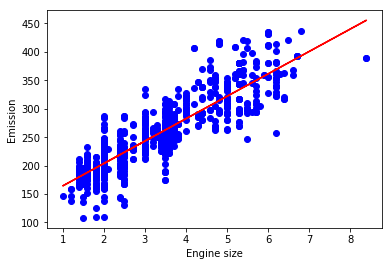

In [18]:
## plotting the fit line on the data:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train[['ENGINESIZE']], lm.coef_[0][0]*train[['ENGINESIZE']] + lm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [19]:
## using sklearn.metrics to evaluate the r2 score and mean squared error for the data:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat -test[['CO2EMISSIONS']] )))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - test[['CO2EMISSIONS']]) ** 2))
print("R2-score: %.2f" % r2_score(yhat , test[['CO2EMISSIONS']]) )
print("MSE: %.2f" % mean_squared_error(yhat , test[['CO2EMISSIONS']]) )

Mean absolute error: 23.35
Residual sum of squares (MSE): 895.82
R2-score: 0.73
MSE: 895.82


## Multiple linear regression

In [20]:
fuel_con.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [21]:
mult = fuel_con[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
mult.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [22]:
## creating the testing and training data split:
data = np.random.rand(len(fuel_con)) < 0.8
train = mult[data]
test = mult[~data]

In [23]:
## multiple Linear Regression model:
mlm = LinearRegression()

In [24]:
mlm.fit(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']],train[['CO2EMISSIONS']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
## the coefficients for the data:
mlm.coef_

array([[ 12.19135012,   6.71379573, -10.75427494, -10.9424753 ,
         30.67364703]])

In [26]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,11.2,7.7,9.6,221
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
9,2.4,4,10.6,7.5,9.2,212
16,4.7,8,17.4,11.3,14.7,338


In [27]:
## predicting the test data:
yhat_2 = mlm.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])

In [28]:
yhat_2[0:5]

array([[213.47755247],
       [244.82289749],
       [257.33231184],
       [209.84915369],
       [318.7390248 ]])

In [29]:
print("Residual sum of squares: %.2f"
      % np.mean((yhat_2 - test[['CO2EMISSIONS']]) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlm.score(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']], test[['CO2EMISSIONS']]))

Residual sum of squares: 584.29
Variance score: 0.85


### Polynomial regression

In [30]:
## tranform the polynomial model to linear regression model using polynomal features:
from sklearn.preprocessing import PolynomialFeatures

## transforming the given model to linear model:
pl = PolynomialFeatures(2)

In [31]:
train_x =train[['ENGINESIZE']]
train_y =train[['CO2EMISSIONS']]

In [32]:
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

In [33]:
## tranforming the training data:
train_x_poly = pl.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [34]:
## using linear regression model to fit the given data:
ll =LinearRegression()
train_y_ = ll.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', ll.coef_)
print ('Intercept: ',ll.intercept_)

Coefficients:  [[ 0.         49.79666426 -1.34296138]]
Intercept:  [107.15966834]


Text(0, 0.5, 'Emission')

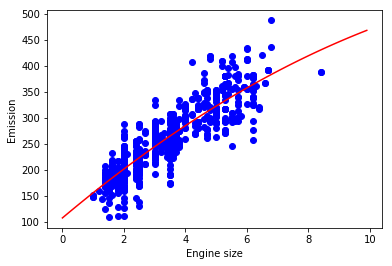

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = ll.intercept_[0]+ ll.coef_[0][1]*XX+ ll.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [36]:
## transforming and fitting the teast data :
from sklearn.metrics import r2_score

test_x_poly = pl.fit_transform(test_x)
test_y_ = ll.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" %r2_score(test_y_ , test_y) )

Mean absolute error: 24.86
Residual sum of squares (MSE): 1030.22
R2-score: 0.70


## Non linear regression analysis:

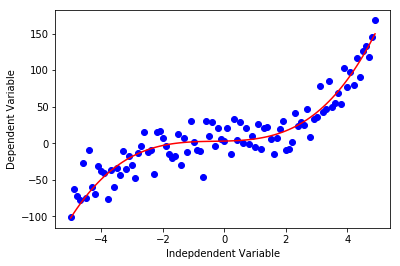

In [37]:
## graphs of various functions:

# cubic
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

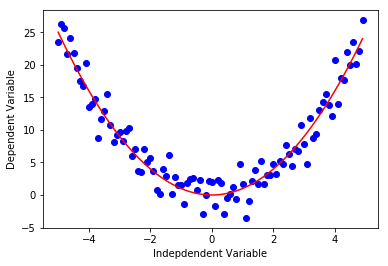

In [38]:
# quadratic
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

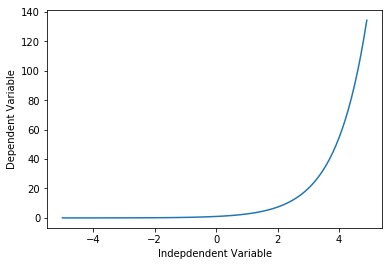

In [39]:
# exponential
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


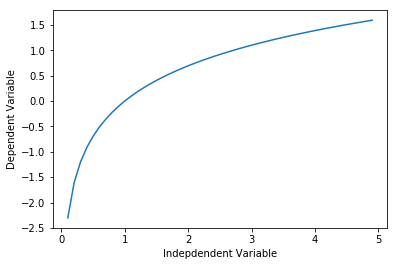

In [40]:
## logx
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

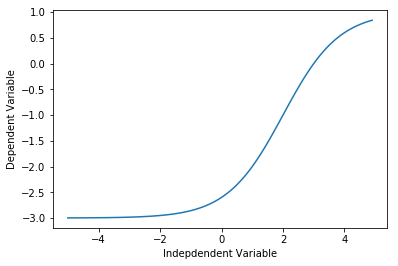

In [41]:
## sigmoidal/logistic
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [42]:
## using china's gdp to plot the one of the non-linear functions:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv'
df= pd.read_csv(url)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


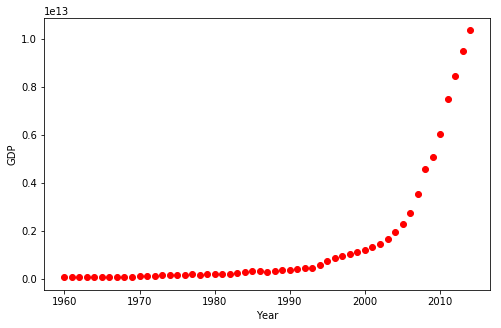

In [43]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

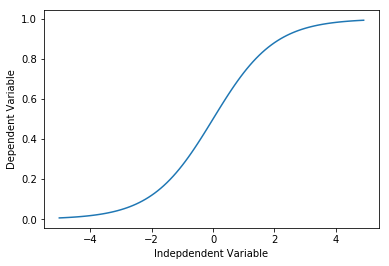

In [44]:
## choosing a specific model:(sigmoid/logistic)
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [45]:
## building the model:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

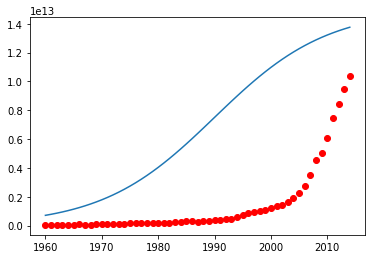

In [46]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [47]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [48]:
## we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data.
## Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.453017, beta_2 = 0.997207


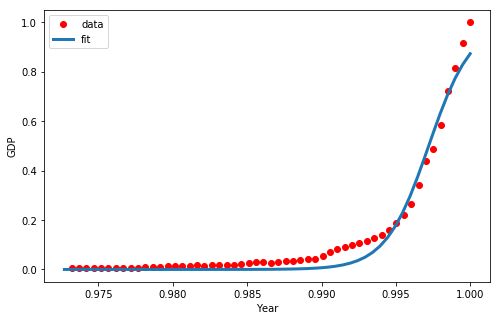

In [49]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [50]:
## calculate the accuracy of our model:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.94


# 2. CLASSIFICATION

## 2a. KNN (K NEAREST NEIGHBORS)

In [51]:
## IMPORTING REQUIRED LIBRARIES:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

THE DATA SET - Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. 
If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. 
It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 


In [52]:
# getting the dataset:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv'
df_tele = pd.read_csv(data_url)

In [53]:
df_tele.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [54]:
## we have 'CUSCAT' as the target categorical variable:
# checking the number of classes in our target variable:
df_tele['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97417bb550>,
      dtype=object)

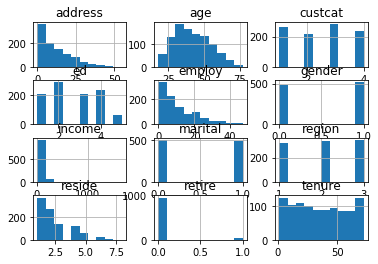

In [55]:
## exploring the independent variables:
df_tele.hist()

In [56]:
## converting the pd dataframe into numpy array for scikit-learn library:
X = df_tele[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [57]:
## normalising the data using standard scaler:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [58]:
y = df_tele['custcat'].values
## using splitting the data into training-testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [59]:
## classification:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = [1,2,3,4,5,6,7,8,9,10]
train_set_accuracy = []
test_set_accuracy = []

## creating a loop to check the values of k:
for k in k_values:
    
    ## training the model on the training set and putting the tested values in the mean_values list:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    
    ## predicting the values in the testset:
    yhat = neigh.predict(X_test)
    
    ## using the metrics to classify the best value of k:
    train_set_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
    test_set_accuracy.append( metrics.accuracy_score(y_test, yhat))

## printing and plotting the values:

print("The values of k", k_values)
print("Training accuracy for given k",train_set_accuracy) 
print("Testing accuracy for given k",test_set_accuracy)

test_set_accuracy = pd.DataFrame(test_set_accuracy)
print("max testing accuracy of",test_set_accuracy.max())


The values of k [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training accuracy for given k [1.0, 0.6175, 0.56875, 0.5475, 0.5375, 0.51625, 0.5125, 0.4925, 0.5025, 0.4875]
Testing accuracy for given k [0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34, 0.33]
max testing accuracy of 0    0.34
dtype: float64


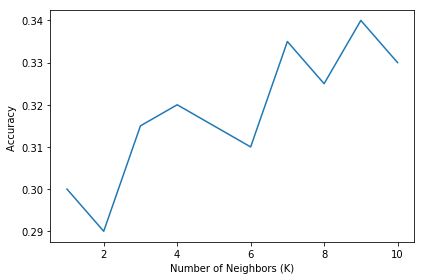

In [60]:
plt.plot(k_values,test_set_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## 2b. Decision trees:

In [61]:
## importing the important library for decision tree:
from sklearn.tree import DecisionTreeClassifier

In [63]:
## using the patient dataset to determin which drug to be given (A,B : binary classifier problem)
url_2 = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
my_data = pd.read_csv(url_2)

In [64]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [66]:
## size of the data:
my_data.shape

(200, 6)

In [68]:
## pre-processing the data:

# taking out the attributes needed for the decision tree for classification:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Some features in this dataset are categorical such as **Sex** or **BP**. Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. **pandas.get_dummies()**
Convert categorical variable into dummy/indicator variables.


In [69]:
## converting categorical variables into dummy variables:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [70]:
## target variable:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [71]:
## splitting the data inot train-test split:
from sklearn.model_selection import train_test_split

# To check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [73]:
## MODELING THE DECISION TREE:
drug_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drug_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
## fitting the training dataset:
drug_tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
## maing a prediction:
predTree = drug_tree.predict(X_testset)

In [77]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [80]:
## model evaluation:
# Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  
# In multilabel classification, the function returns the subset accuracy. 

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [81]:
## visualisation of the tree:
!pip install pydotplus

     |████████████████████████████████| 286kB 7.9MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [83]:
!pip install graphviz

In [84]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

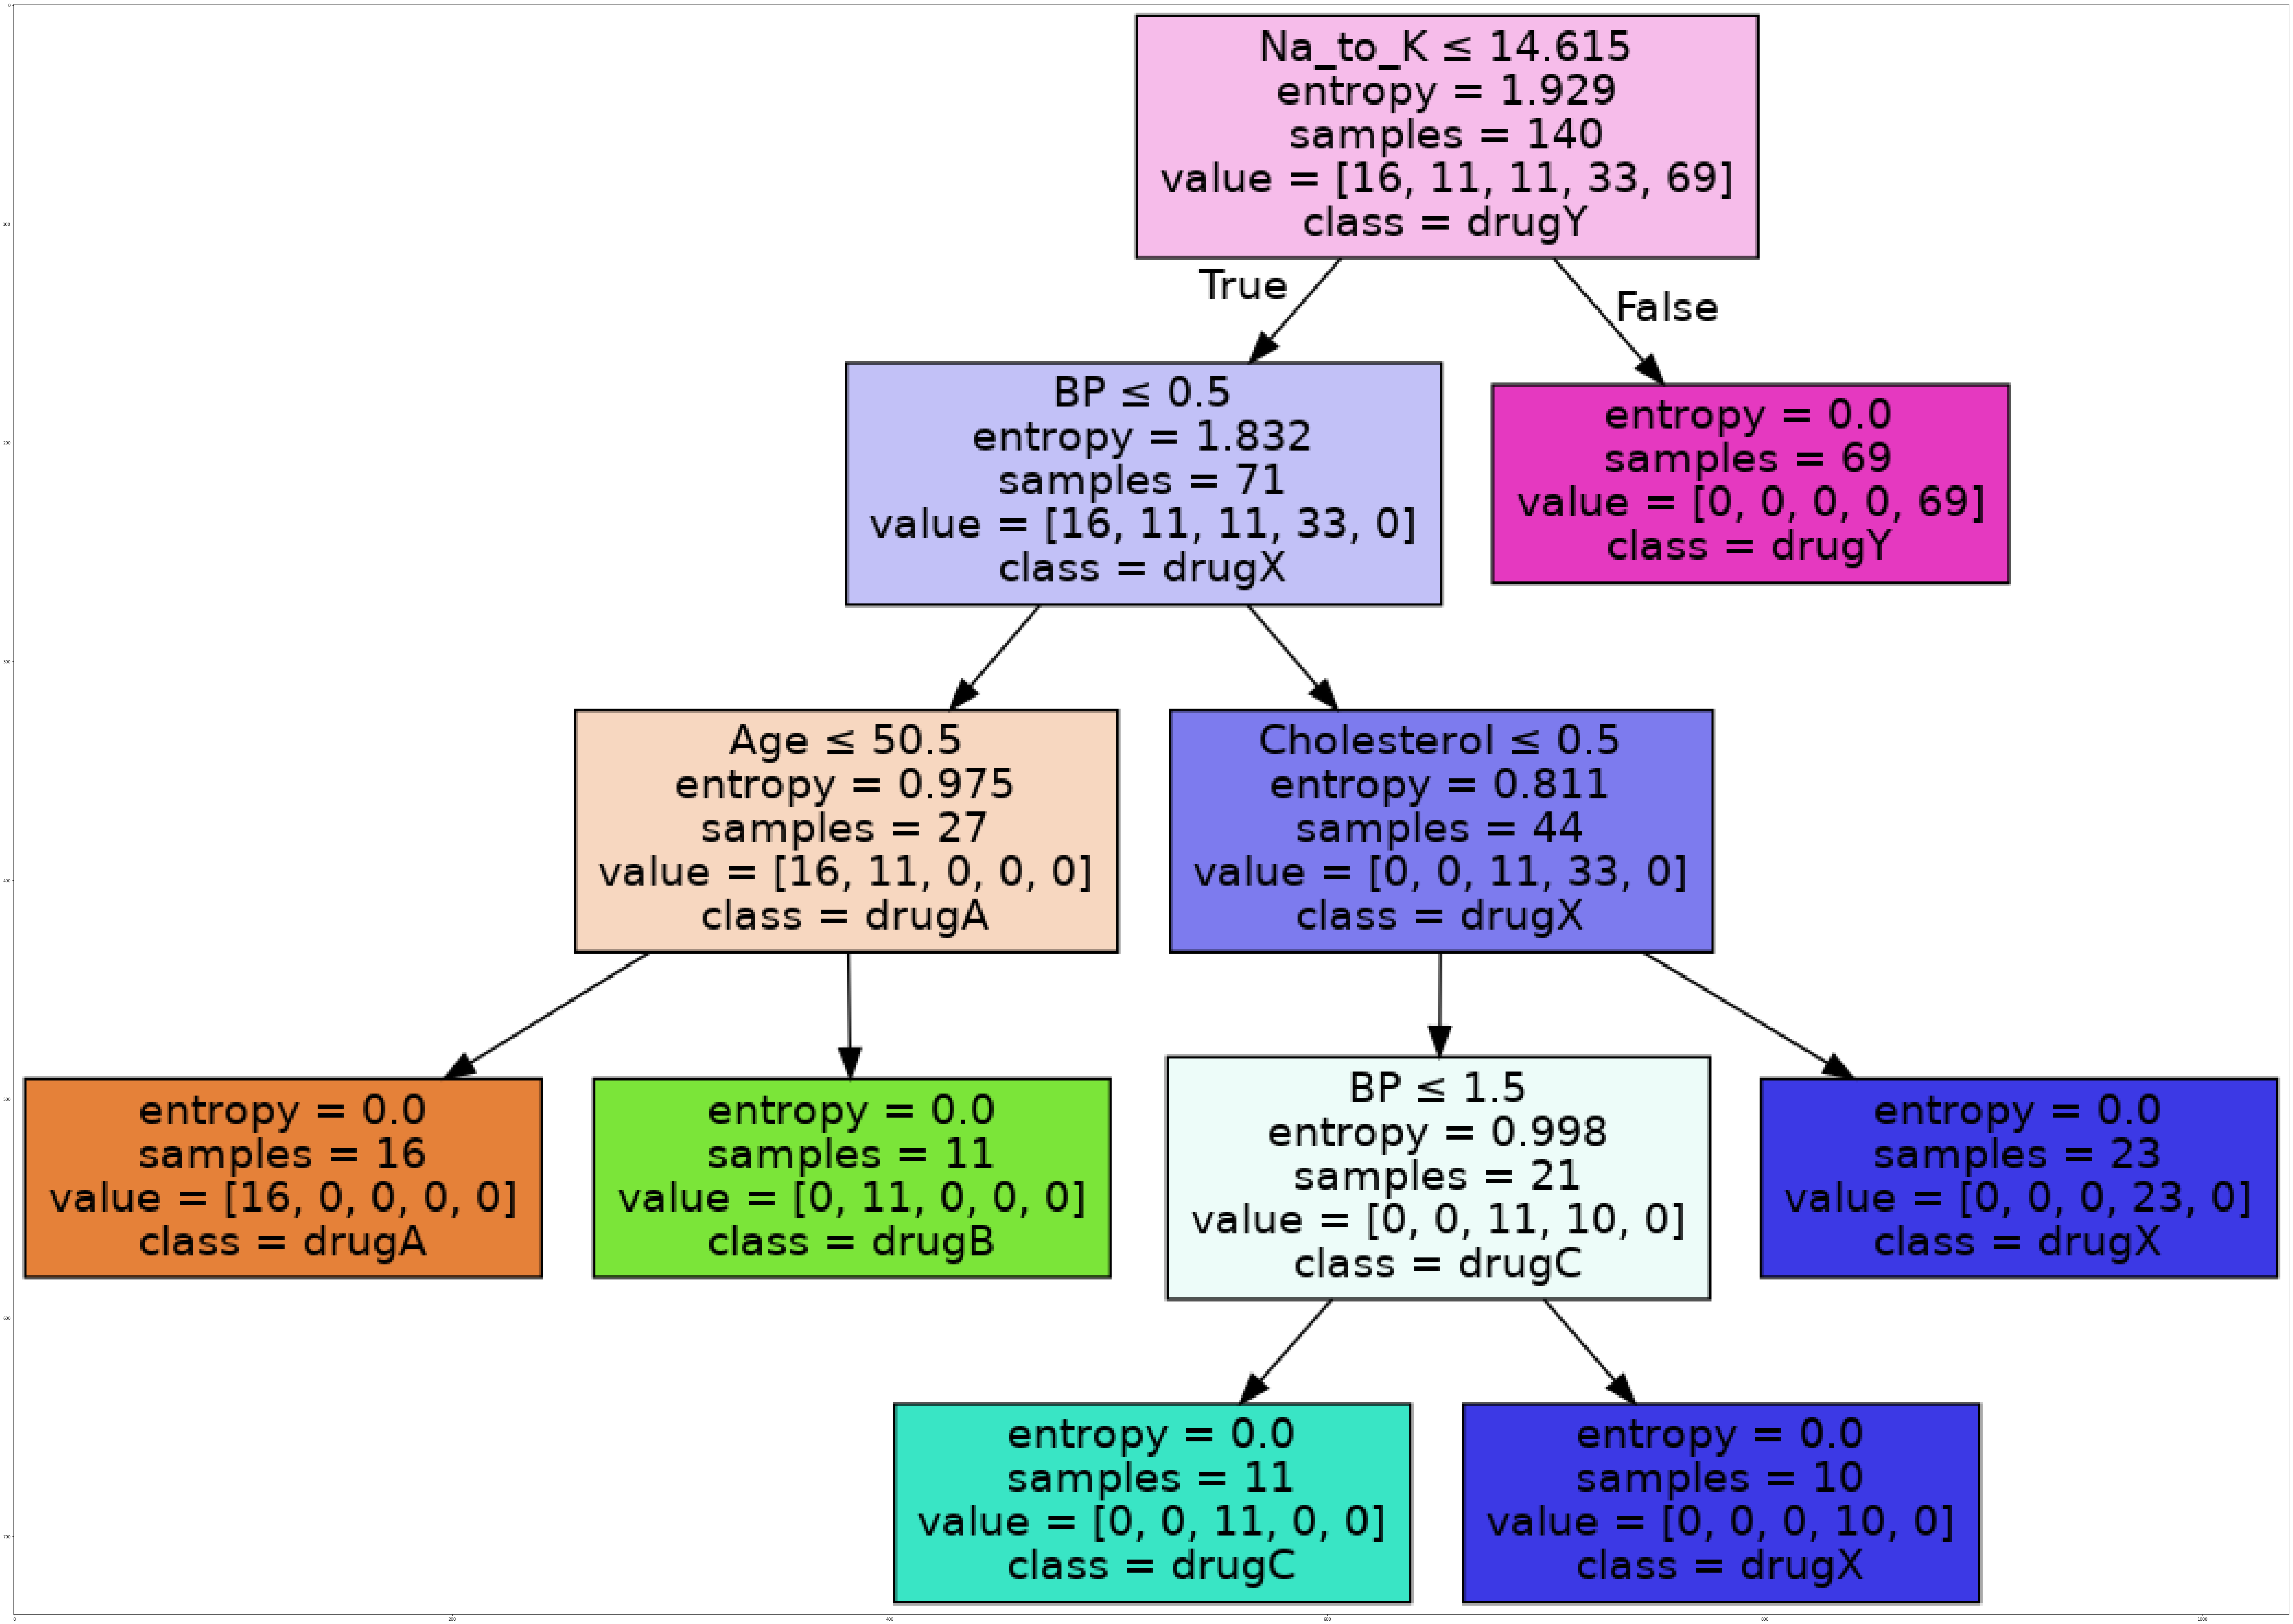

In [85]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drug_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')